Team:
- Karina Campos Almeida
- Gabriel Islas Peraza
- Jair Armando Martinez Castillo
- Luis Fernando Monterrubio Cota
- Cynthia Vidal Ovando

# L2.2 Diffusion of Innovations

The Bass Model developed by Frank Bass (1969) describes the process of diffusion of innovations. It is a classical mathematical model in marketing literature.

Consider that $A(t)$ denotes the total population that adopted an innovation until time $t$- The total of potential adopters is denoted as $P$. According to this model, the adoption rate at which the number of adopters changes throughout time depends on how innovative is the product being adopted.

$$
\frac{dA(t)}{dt} = i(t) [P-A(t)]
$$

where $i(t)$ denotes the coefficient of diffusion, which describes the innovativeness of the product being adopted. There are various methods of defining the diffusion coefficient. In particular, the following three models for computing $i(t)$ are going to be considered:
* External-Influence Model
$$
i(t) = \alpha
$$

* Internal-Influence Model
$$
i(t) = \beta A(t)
$$

* Mixed-Influence Model
$$
i(t) = \alpha + \beta A(t)
$$
where $\alpha$ is the external-influence factor and $\beta$ is the internal-influence factor or imitation factor.

## 1. Solving Ordinary Differential Equations

An equation which contains the derivate(s) of a yet to be determined function $y(x)$ is called an ordinary differential equation (ODE).

The SciPy Library [[1](https://docs.scipy.org/doc/scipy/reference/integrate.html)] includes different methods to solves ODE's in python: ```ode``` and ```odeint```.

## 1.1 Newton's Law of Cooling

The Newton's Law of Cooling states that the rate of change of temperature T is proportional to temperature difference with the enviroment ($T_{amb}$). An extensive description of this phenomena can be found here [[2](https://www.khanacademy.org/math/differential-equations/first-order-differential-equations/exponential-models-diff-eq/v/newtons-law-of-cooling)].
$$
\frac{dT}{dt} = - k (T-T_{amb})
$$

where k is the cooling coefficient. 
The ```odeint``` method can be used this ODE. ```odeint``` requires three inputs:
```python
scipy.integrate.odeint(func, y0, t)
                       
```
* func: Function that return derivative values at y and t.
* y0: Initial conditions on y.
* t: A sequence of time points for which to solve for y.

Consider a cup of coffee at 95 $^\circ$C in a room where the temperature is 20 $^\circ$C. If the cooling coefficient is $k = 1/50$ min$^{-1}$.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def fun(T, t, k, Tamb):
    dTdt = - k * (T - Tamb)
    return dTdt

In [3]:
T0 = 95
k = 1/50
Tamb = 20
t = np.linspace(0,60)

In [4]:
T = odeint(fun, T0, t, args = (k, Tamb))

The analytical solution of the problem can be obtained by direct integration:
$$
T(t) = (T(0) - T_{amb}) e^{-kt} + T_{amb}
$$

In [5]:
def yAnalytical(T0, Tamb, k, t):
    return (T0-Tamb)*np.exp(-k*t)+Tamb

The numerical and the analytical solution are presented in the following plot.

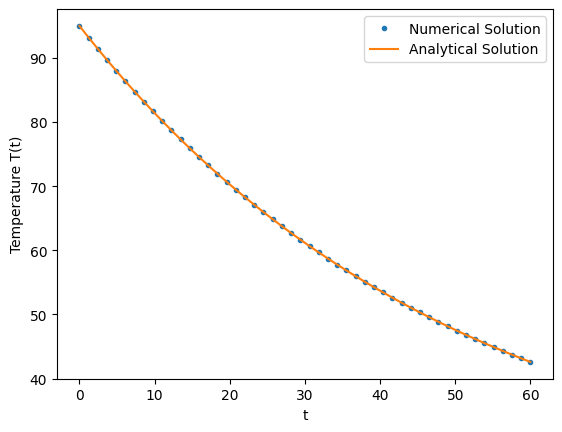

In [6]:
plt.plot(t, T, '.', label = 'Numerical Solution')
plt.plot(t, yAnalytical(T0, Tamb, k, t), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('Temperature T(t)')
plt.show()

## 1.2 External-Influence Model

In the external-influence model, the adoption coefficeint only depends on an external factor. One example of external influence in social media is when important news goes viral.

The external-influence model can be formulated as,
$$
\frac{dA(t)}{dt} = \alpha[P-A(t)]
$$

The analytical solution when A(0) = 0 is:
$$
A(t) = P(1-e^{-\alpha t})
$$

Considering a population P = 100 and $\alpha$ = 0.01, the cumulative population over the time can be obtained as follows (numerical and analytical solution).

In [7]:
def fun(A, t, alpha, P):
    dAdt = alpha * (P - A)
    return dAdt

In [8]:
P = 100
A0 = 0
alpha = 0.01
t = np.linspace(0,300)

In [9]:
A = odeint(fun, A0, t, args = (alpha, P))

In [10]:
def externalInfluence(alpha, P, t):
    return P*(1-np.exp(-alpha*t))

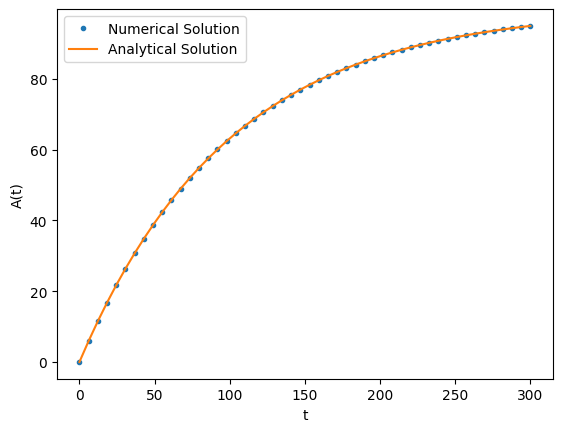

In [12]:
plt.plot(t, A, '.', label = 'Numerical Solution')
plt.plot(t, externalInfluence(alpha, P, t), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('A(t)')
plt.savefig('DiffusionInnovationsl.png')
plt.show()

## Internal-Influence Model

In the internal-influence model, adoption depends on how many have adopted the innovation in the current time step. The internal model can be described as follows:
$$
\frac{dA(t)}{dt} = \beta A(t) [P - A(t)]
$$
This model is called a pure imitation model because the diffusion rate depends only on $\beta A(t)$.

The analytical solution of the model is:
$$
A(t) = \frac{P}{1+\frac{P-A_0}{A_0}e^{-\beta P(t-t0)}}
$$
where $A(t_0) = A_0$,

Considering a population P = 200, $\beta = 10^{-5}$ and $A_0 = 30$, the cumulative population over the time can be obtained as follows (numerical and analytical solution).

In [40]:
def internal_influence(A, t, beta, P):
    dAdt = beta * A * (P - A)
    return dAdt

In [41]:
P = 200
A0 = 30
beta = 1e-5
t0 = 0
t = np.linspace(0, 300, 100)

In [42]:
A_numeric = odeint(internal_influence, A0, t, args=(beta, P))

In [43]:
def analytical_solution(P, A0, beta, t, t0):
    return P / (1 + (P - A0) / A0 * np.exp(-beta * P * (t - t0)))

A_analytic = analytical_solution(P, A0, beta, t, t0)

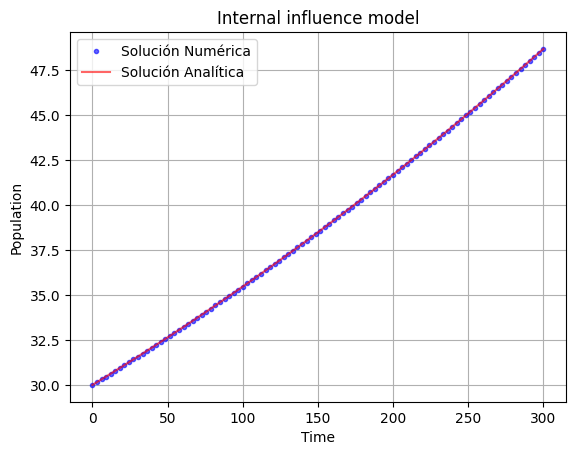

In [47]:
plt.plot(t, A_numeric, 'b.', label='Solución Numérica', alpha=0.6)
plt.plot(t, A_analytic, 'r-', label='Solución Analítica', alpha=0.6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Internal influence model')
plt.grid(True)
plt.show()

## Mixed-Influence Model

The mixed-influence model is situated in between the internal- and external-influece models. The mixed-influence model can be described as follows:
$$
\frac{dA(t)}{dt} = (\alpha + \beta A(t)) [P - A(t)]
$$
This model is called a pure imitation model because the diffusion rate depends only on $\beta A(t)$.

The analytical solution of the model is:
$$
A(t) = \frac{P - \frac{\alpha(P-A_0)}{\alpha + \beta A_0} e^{-(\alpha + \beta P)(t-t_0)}}{1 + \frac{\beta(P-A_0)}{\alpha + \beta A_0} e^{-(\alpha + \beta P)(t-t_0)}}
$$
where $A(t_0) = A_0$,

Considering a population P = 200, $alpha = 10^-{-3}$, $\beta = 10^{-5}$ and $A_0 = 30$, the cumulative population over the time can be obtained as follows (numerical and analytical solution).

In [49]:
def mixed_influence(A, t, alpha, beta, P):
    dAdt = (alpha + beta * A) * (P - A)
    return dAdt

In [50]:
P = 200  
A0 = 30  
alpha = 1e-3 
beta = 1e-5  
t0 = 0
t = np.linspace(0, 300, 100)

In [51]:
A_numeric = odeint(mixed_influence, A0, t, args=(alpha, beta, P))


In [52]:
def analytical_solution(P, A0, alpha, beta, t, t0):
    numerator = P - (alpha * (P - A0)) / (alpha + beta * A0) * np.exp(-(alpha + beta * P) * (t - t0))
    denominator = 1 + (beta * (P - A0)) / (alpha + beta * A0) * np.exp(-(alpha + beta * P) * (t - t0))
    return numerator / denominator

A_analytic = analytical_solution(P, A0, alpha, beta, t, t0)

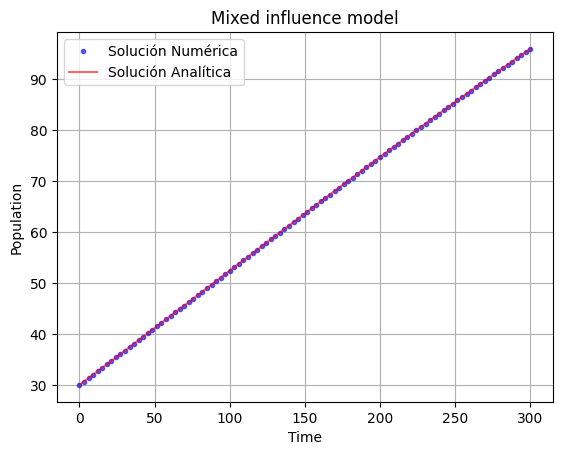

In [54]:
plt.plot(t, A_numeric, 'b.', label='Solución Numérica', alpha=0.6)
plt.plot(t, A_analytic, 'r-', label='Solución Analítica', alpha=0.6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Mixed influence model')
plt.grid(True)
plt.show()

# Product Market Forecasting

Reproduce this Product Market Forecasting using Bass Model: https://srdas.github.io/MLBook/productForecastingBassModel.html with Python. Explain clearly each step. Datasets can be found here: https://app.box.com/s/8uduwzfyezeoupqii76u7a6ro3somole obtained from https://srdas.github.io/MLBook2/.

In [333]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [334]:
def densityFunction(p, q, t):
    return (np.exp((p+q)*t)*p*(p+q)**2)/((p*np.exp((p+q)*t)+q)**2)

Esta función define la densidad de adopción según el Modelo de Bass. Calcula la tasa de adopción en el tiempo t basada en los parámetros de innovación p e imitación q.

In [335]:
data = pd.read_csv('iphone_sales.txt', delim_whitespace=True)


In [336]:
def convert_quarter_to_date(quarter):
    q, y = quarter.split('_')
    q = int(q[1])
    y = int('20' + y)
    month = 3 * q
    if month > 12:
        month -= 12
        y += 1
    return pd.Timestamp(year=y, month=month, day=1)

This function converts the quarter format of the dataset to a pandas timestamp for easy analysis and visualization.

In [337]:
data['date'] = data['Quarter'].apply(convert_quarter_to_date)


In [338]:
date = data['date']

In [339]:
sales = data['Sales_MM_units']


In [340]:
cum_sales = np.cumsum(sales)


In [341]:
cum_sales_squared = cum_sales**2

Extracts the date and sales columns from the dataset, and calculates the cumulative sales and cumulative sales squared, which are used in the regression model.


In [342]:
mod = smf.ols(formula='sales ~ cum_sales + cum_sales_squared', data=data)

In [343]:
res = mod.fit()

Fits an OLS (ordinary least squares) regression model to estimate the parameters of the Bass model. Prints the summary of the regression results.

In [344]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     109.9
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           4.61e-15
Time:                        19:54:01   Log-Likelihood:                -120.18
No. Observations:                  35   AIC:                             246.4
Df Residuals:                      32   BIC:                             251.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6963      2.20

In [345]:
b = res.params
b

Intercept            3.696307
cum_sales            0.112994
cum_sales_squared   -0.000055
dtype: float64

In [346]:
m1 = (-b['cum_sales']+np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m1

-32.206910098759515

In [347]:
m2 = (-b['cum_sales']-np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m2

2083.8220174932867

In [348]:
m = max(m1, m2)
print(m)

2083.8220174932867


In [349]:
p = b['Intercept']/m
q = -m*b['cum_sales_squared']
print("p = ",p)
print("q = ", q)

p =  0.0017738112418998347
q =  0.11476751136366699


Calculate the market potential (m), the innovation coefficient (p) and the imitation coefficient (q) using the regression parameters.


### Explanation of the Bass Diffusion Model

The Bass Diffusion Model is used to model the adoption of new products in the market. The two main parameters are:

- **Coefficient of Innovation (p)**: Represents the probability that an individual adopts the product due to innovation.
- **Coefficient of Imitation (q)**: Represents the probability that an individual adopts the product due to imitation of others.

The Bass density function describes the rate of adoption at time `t`, and is defined as:

[ f(t) = \frac{(p + q)^2 \cdot e^{-(p+q)t} \cdot p}{(p \cdot e^{-(p+q)t} + q)^2} ]


In [350]:
date_forecast = pd.date_range(start='2007-Q3', end='2030-Q3', freq='QS')


In [351]:
t = range(len(date_forecast))

In [352]:
f = densityFunction(p,q,t)
sales_forecast = m*f


Generates forecasted sales using the parameters of the Bass model over a specified time range.

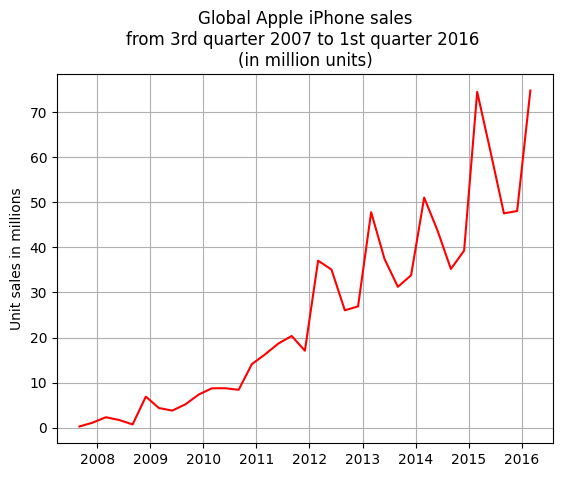

In [353]:
fig, ax = plt.subplots()
ax.plot(date, sales, color='red')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone sales\nfrom 3rd quarter 2007 to 1st quarter 2016 \n(in million units)")
#plt.legend()
ax.grid(True)
plt.show()

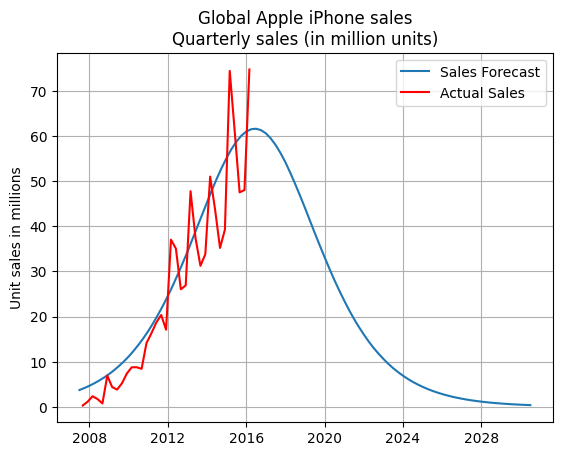

In [354]:
fig, ax = plt.subplots()
ax.plot(date_forecast, sales_forecast, label='Sales Forecast')
ax.plot(date, sales, color='red', label='Actual Sales')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone sales\nQuarterly sales (in million units)")
plt.legend()
ax.grid(True)
plt.show()

Plots actual sales data and forecasted sales data

In [355]:
sales_apple = sales
date_apple = date
date_forecast_apple = date_forecast
sales_forecast_apple = sales_forecast

# Sales peak 

In [356]:
peak_time = -1/(p+q)*np.log(p/q)
peak_time

35.77939457746893

In [357]:
print(data['Sales_MM_units'].idxmax() + 1)

35


## Samsung

In [358]:
data2 = pd.read_csv('galaxy_sales.csv')

In [359]:
data2.head()

,Quarter,sales
0,Q1 '10,64.90
1,Q2 '10,65.33
2,Q3 '10,71.67
3,Q4 '10,79.17
4,Q1 '11,68.78


In [360]:
quarter = data2['Quarter']
qs = quarter.str.replace(r"(Q\d) '(\d+)", r'20\2-\1', regex=True)  # e.g., "Q1 '10" to "2010-Q1"
qs = qs.str.replace('*', '', regex=False)  # Remove any asterisks if present

# Convert the cleaned string to a PeriodIndex and then to timestamps
data2['date'] = pd.PeriodIndex(qs.values, freq='Q').to_timestamp()


In [361]:
date = data2['date']


In [362]:
# Get coefficients
sales = data2['sales']

In [363]:
cum_sales = np.cumsum(sales)
cum_sales_squared = cum_sales**2

In [364]:
mod = smf.ols(formula='sales ~ cum_sales + cum_sales_squared', data=data2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     43.44
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           8.17e-08
Time:                        19:54:02   Log-Likelihood:                -73.418
No. Observations:                  22   AIC:                             152.8
Df Residuals:                      19   BIC:                             156.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.7484      4.50

In [365]:
b = res.params
b

Intercept            53.748387
cum_sales             0.076600
cum_sales_squared    -0.000028
dtype: float64

In [366]:
m1 = (-b['cum_sales']+np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m2 = (-b['cum_sales']-np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])

In [367]:
m = max(m1, m2)
m

3308.96521821821

In [368]:
p = b['Intercept']/m
q = -m*b['cum_sales_squared']
print("p = ",p)
print("q = ", q)

p =  0.016243261464994826
q =  0.09284320017915797


Processes and analyzes Samsung Galaxy sales data in a manner similar to Apple's data.

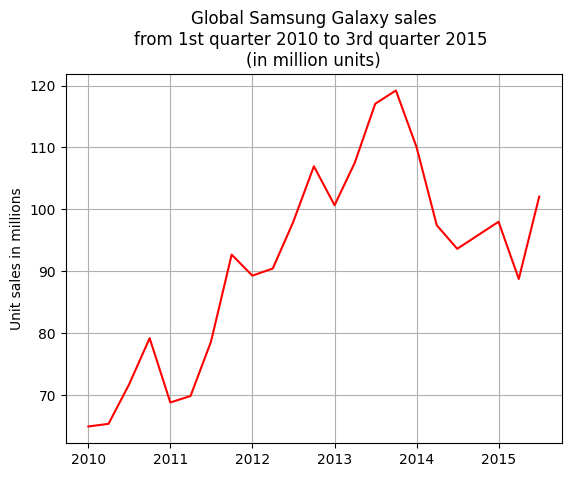

In [369]:
fig, ax = plt.subplots()
ax.plot(date, sales, color='red')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Samsung Galaxy sales\nfrom 1st quarter 2010 to 3rd quarter 2015 \n(in million units)")
#plt.legend()
ax.grid(True)
plt.show()

In [370]:
date_forecast = pd.date_range(start='2010-Q1', end='2030-Q3', freq='QS')


In [371]:
t = range(len(date_forecast))
f = densityFunction(p,q,t)
sales_forecast = m*f

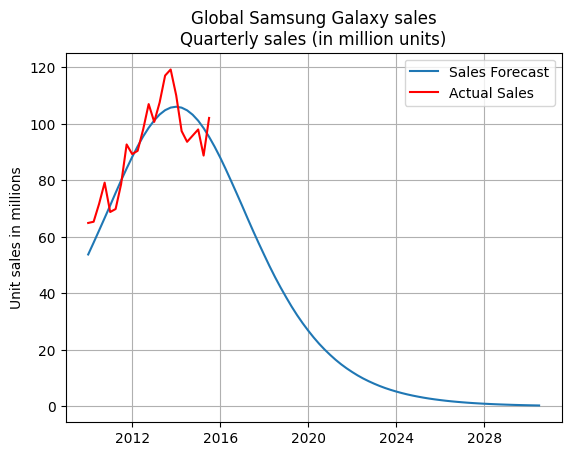

In [372]:

fig, ax = plt.subplots()
ax.plot(date_forecast, sales_forecast, label='Sales Forecast')
ax.plot(date, sales, color='red', label='Actual Sales')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Samsung Galaxy sales\nQuarterly sales (in million units)")
plt.legend()
ax.grid(True)
plt.show()

In [373]:
sales_samsung = sales
date_samsung = date
date_forecast_samsung = date_forecast
sales_forecast_samsung = sales_forecast

# Sales peak

In [374]:
peak_time = -1/(p+q)*np.log(p/q)
peak_time

15.98029563590453

In [375]:
print(data2['sales'].idxmax() + 1)

16


## Comparasion

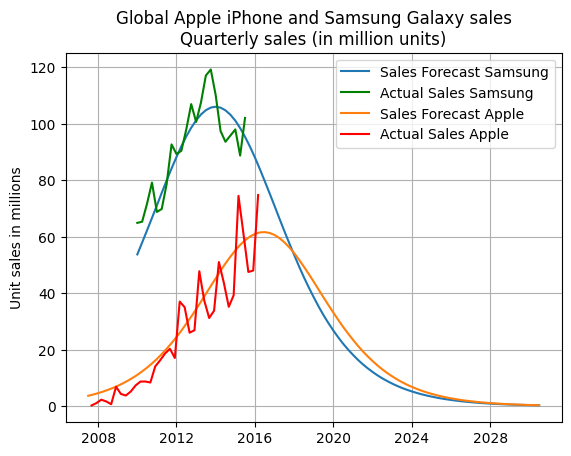

In [376]:
fig, ax = plt.subplots()
ax.plot(date_forecast_samsung, sales_forecast_samsung, label='Sales Forecast Samsung')
ax.plot(date_samsung, sales_samsung, color='green', label='Actual Sales Samsung')
ax.plot(date_forecast_apple, sales_forecast_apple, label='Sales Forecast Apple')
ax.plot(date_apple, sales_apple, color='red', label='Actual Sales Apple')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone and Samsung Galaxy sales\nQuarterly sales (in million units)")
plt.legend()
ax.grid(True)
plt.show()

Generates and plots sales forecasts for Samsung Galaxy and compares them to Apple iPhone sales.

## References

This notebook is based on:

[1]  Reza Zafarani, Mohammad Ali Abbasi, Huan Liu (2014) Social Media Mining: An Introduction. UK.